In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import testing_funcs as tf
import os


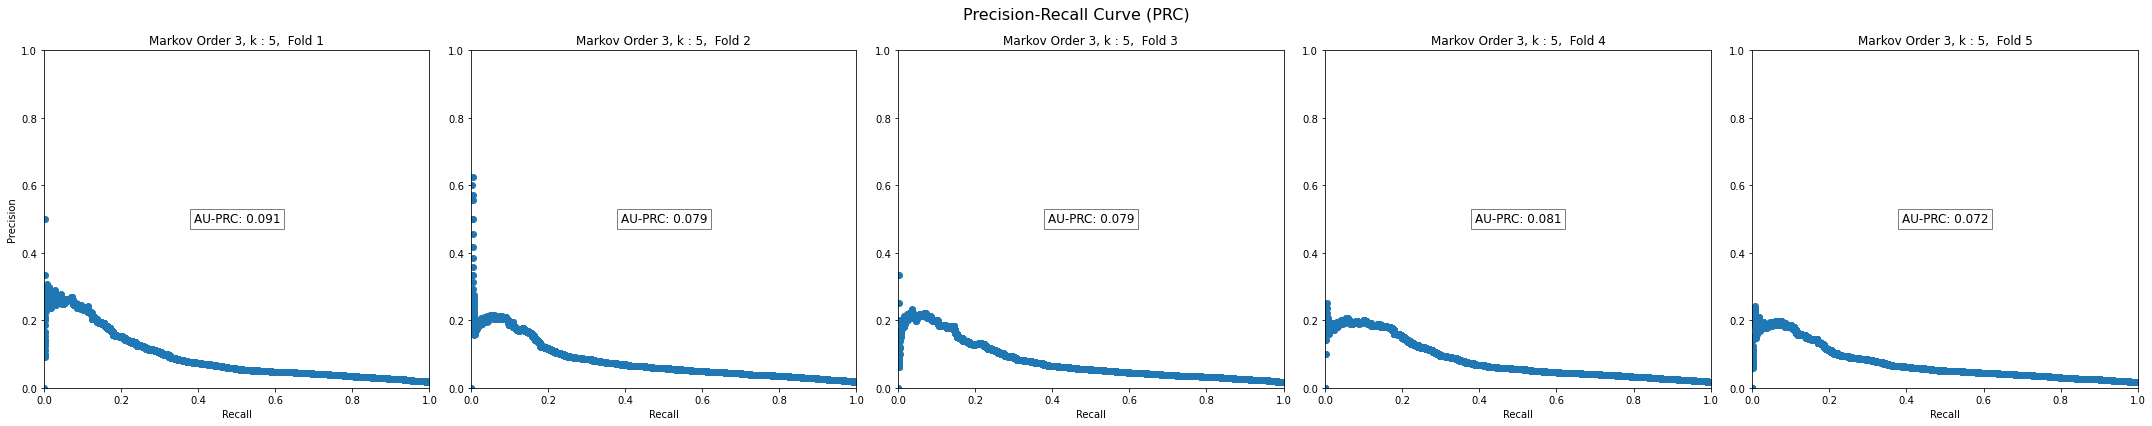

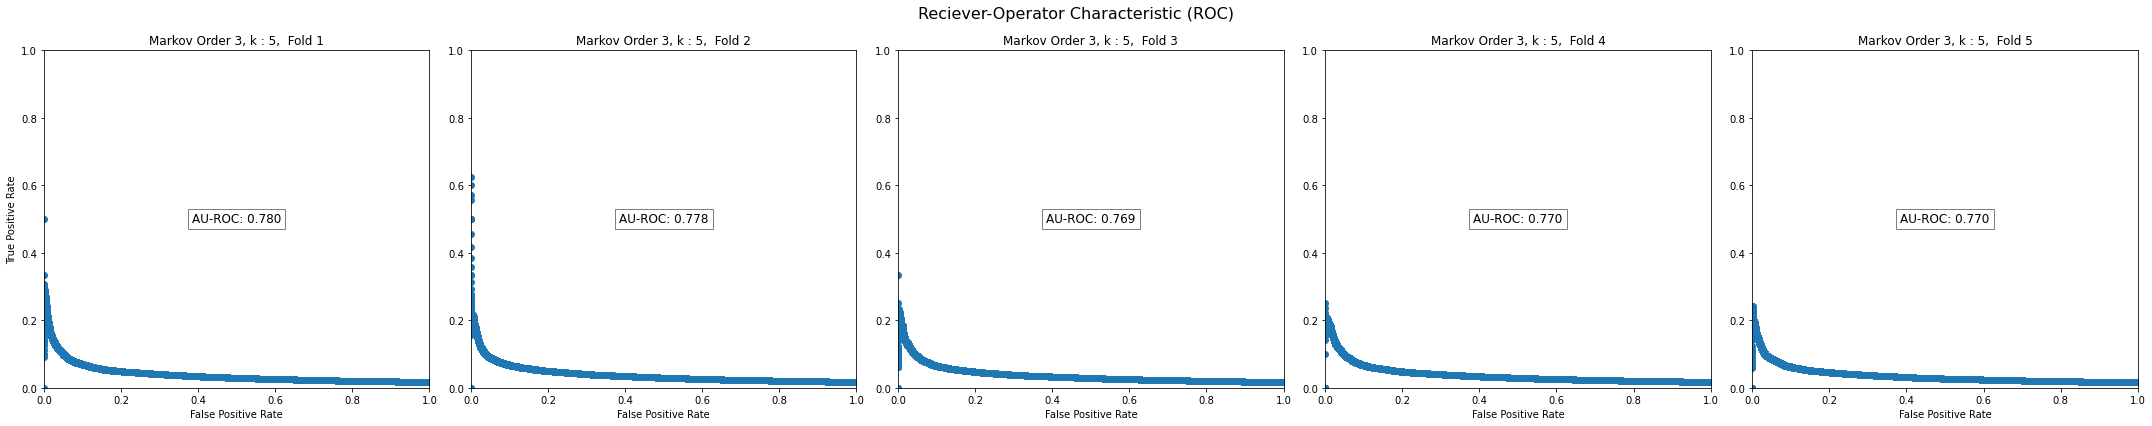

In [14]:
#Plotting AUC curves

def plot_auROC(markov_order,kfold,plots_file_path):
    os.makedirs(plots_file_path, exist_ok=True)
    m = markov_order
    k = kfold

    df_list = []
    for i in range(1,k+1):
        df = pd.read_csv(f'./resultData/m{m}k{k}f{i}.csv')
        df_list.append(df)

    fig, ax = plt.subplots(1,k,figsize=(6*k,6))
    for i in range(k):
        df = df_list[i]
        FPR = 1 - df['Specificity'].to_numpy()
        TPR = df['Precision'].to_numpy()
        auROC = tf.AU_ROC(df)

        ax[i].scatter(FPR,TPR,label=f'Fold {i+1})')
        ax[i].set_title(f'Markov Order {m}, k : {k},  Fold {i+1}')
        ax[i].set_xlabel('False Positive Rate')
        ax[i].text(0.5, 0.5, f'AU-ROC: {auROC:.3f}', ha='center', va='center', transform=ax[i].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
        ax[i].set_xlim(0,1)
        ax[i].set_ylim(0,1)

    ax[0].set_ylabel('True Positive Rate')
    fig.suptitle(f'Reciever-Operator Characteristic (ROC)', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{plots_file_path}/m{m}k{k}_ROC',dpi=600,
    facecolor='white',
    edgecolor='white',
    transparent=False)
    plt.show()

def plot_auPRC(markov_order,kfold,plots_file_path):
    os.makedirs(plots_file_path, exist_ok=True)
    m = markov_order
    k = kfold

    df_list = []
    for i in range(1,k+1):
        df = pd.read_csv(f'./resultData/m{m}k{k}f{i}.csv')
        df_list.append(df)

    fig, ax = plt.subplots(1,k,figsize=(6*k,6))
    for i in range(k):
        df = df_list[i]
        recall = df['Recall'].to_numpy()
        precision = df['Precision'].to_numpy()
        auROC = tf.AU_PRC(df)

        ax[i].scatter(recall,precision,label=f'Fold {i+1})')
        ax[i].set_title(f'Markov Order {m}, k : {k},  Fold {i+1}')
        ax[i].set_xlabel('Recall')
        ax[i].text(0.5, 0.5, f'AU-PRC: {auROC:.3f}', ha='center', va='center', transform=ax[i].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
        ax[i].set_xlim(0,1)
        ax[i].set_ylim(0,1)

    ax[0].set_ylabel('Precision')
    fig.suptitle(f'Precision-Recall Curve (PRC)', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{plots_file_path}/m{m}k{k}_PRC',dpi=600,
    facecolor='white',
    edgecolor='white',
    transparent=False)
    plt.show()


plot_auPRC(3,5,'./auprc_plots')
plot_auROC(3,5,'./auROC_plots')

        







    

        

